## Analiza spletne strani Math Stack Exchange
Poglejmo kako najbolje postaviti vprašanje na MSE

In [1]:
import pandas as pd

In [127]:
vprasanja = pd.read_csv("vprasanja.csv", index_col="id")
oznake = pd.read_csv("oznake_vprasanj.csv")
vprasanja_z_oznakami = pd.merge(vprasanja, oznake, left_on="id", right_on="id")

<Axes: xlabel='Število vprašanj', ylabel='oznaka'>

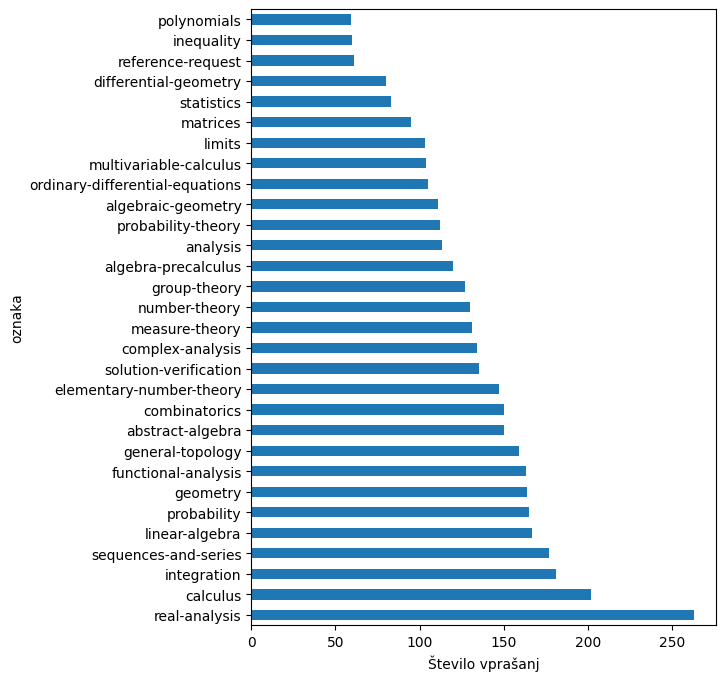

In [147]:
#Poglejmo si najbolj popularne oznake na MATH STACK EXCHANGE (najvec vprasanj s to oznako)
top50_oznake = vprasanja_z_oznakami["oznaka"].value_counts().head(30).index #najbolj popularne oznake
vprasanja_z_oznakami["oznaka"].value_counts().head(30).plot.barh(figsize=(6,8),xlabel="Število vprašanj")

<Axes: xlabel='% neodgovorjenih vprašanj', ylabel='oznaka'>

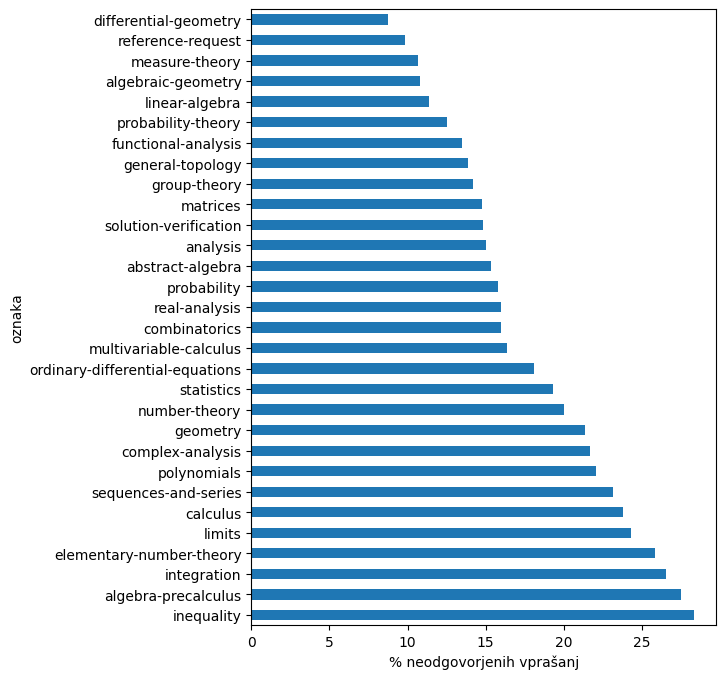

In [146]:
#Pogledali si bomo katere oznake imajo največ neodgovorjenih vprašanj. Izločil bom vprašanja z manj kot 300 ogledi.
#Cilj je ugotoviti katere veje matematike imajo največ težkih vprašanj oziroma katere kategorije imajo najmanj sprejetih odgovorov
#oziroma za katero temo bomo najverjetneje dobili odgovor na vprasanje
brez_sprej_odg = vprasanja_z_oznakami[(vprasanja_z_oznakami["Ima sprejet odgovor"] == False) & (vprasanja_z_oznakami["Ogledi"] >= 100) & (vprasanja_z_oznakami["oznaka"].isin(top50_oznake))]#vsi brez sprejetega odgovora
st_brez_odg = brez_sprej_odg.groupby("oznaka").size() #za vsako oznako dobim število vprašanj brez sprejetega odgovora
st_vseh = vprasanja_z_oznakami[vprasanja_z_oznakami["oznaka"].isin(top50_oznake)].groupby("oznaka").size()
tezavnost = (st_brez_odg / st_vseh) * 100
tezavnost.sort_values(ascending=False).plot.barh(figsize=(6,8),xlabel="% neodgovorjenih vprašanj")

/var/folders/lj/fhnk8b7x1kl5hhh1nvzbczk00000gn/T/ipykernel_4568/2565043380.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vprasanja_z_reputacijo.groupby(pd.cut(vprasanja_z_reputacijo["reputation"], bins=bins, labels=labels))["Glasovi"].mean().plot(figsize=(8,8))


<Axes: xlabel='reputation'>

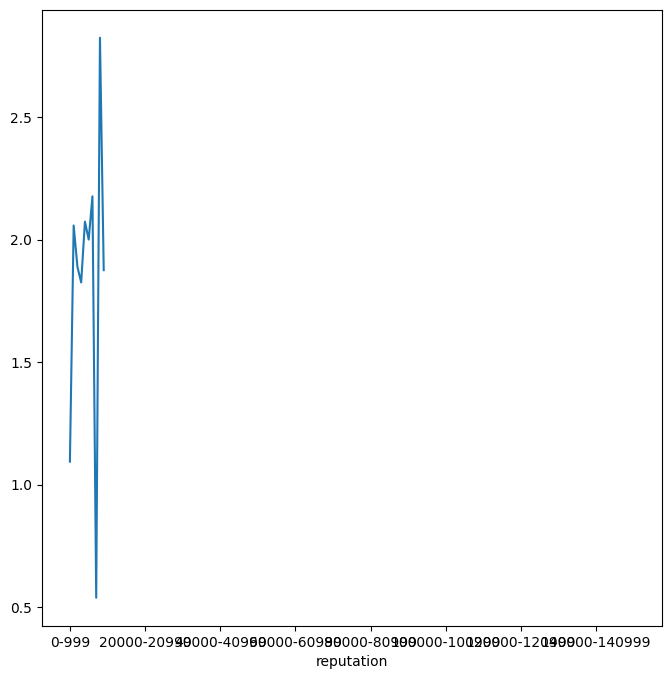

In [132]:
#Poglejmo kako je povezan ugled avtorja z uspehom ("glasovi") vprasanja
avtorji = pd.read_csv("avtorji.csv")
vprasanja_z_reputacijo = pd.merge(vprasanja, avtorji, left_on="Avtor", right_on="author")
max_rep = vprasanja_z_reputacijo["reputation"].max()
bins  = range(0, int(max_rep) + 1000, 1000)
labels = [f"{i}-{i+999}" for i in bins[:-1]]
vprasanja_z_reputacijo.groupby(pd.cut(vprasanja_z_reputacijo["reputation"], bins=bins, labels=labels))["Glasovi"].mean().plot(figsize=(8,8))

<Axes: xlabel='Dolzina naslova', ylabel='Ogledi'>

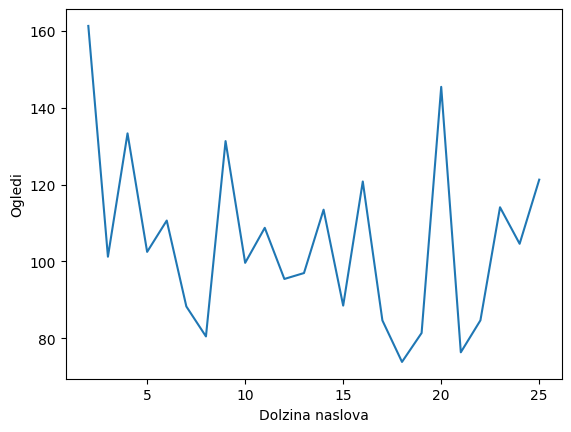

In [151]:
#Poglejmo kako dolzina naslova vpliva na oglede/oceno/st odgovorov/sprejet odgovor. gledamo samo tiste dolzine za katere obstaja vsaj 5 vprasanja s tako dolzino
vprasanja["Dolzina naslova"] = vprasanja["Naslov"].str.split().str.len()
vprasanja_filter = vprasanja.groupby("Dolzina naslova").filter(lambda x: len(x) > 10)
vprasanja_filter.groupby("Dolzina naslova")["Ogledi"].mean().plot(ylabel="Ogledi")

<Axes: xlabel='Dolzina naslova', ylabel='Število odgovorov'>

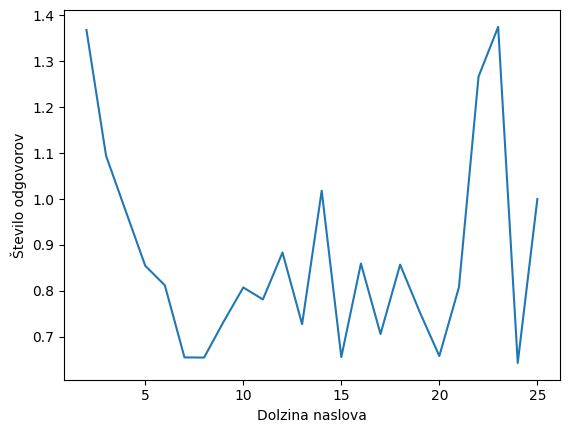

In [152]:
vprasanja_filter.groupby("Dolzina naslova")["Število odgovorov"].mean().plot(ylabel="Število odgovorov")

<Axes: xlabel='Dolzina naslova', ylabel='% vprašanj s sprejetim odgovorom'>

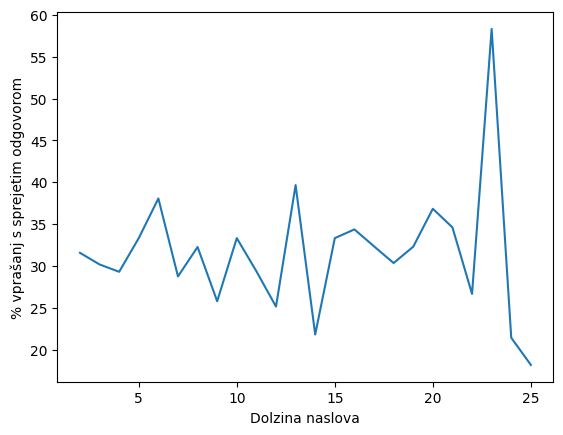

In [153]:
vprasanja_filter.groupby("Dolzina naslova")["Ima sprejet odgovor"].mean().mul(100).plot(ylabel="% vprašanj s sprejetim odgovorom")

<Axes: xlabel='število oznak'>

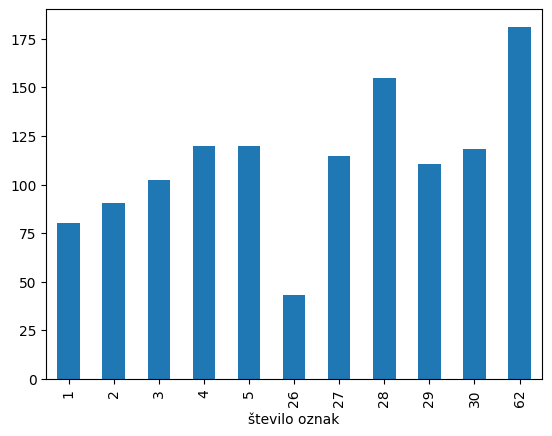

In [144]:
#Poglejmo si kako število oznak vpliva na število ogledov/glasov/odgovorov
vprasanja_z_oznakami["število oznak"] = vprasanja_z_oznakami.groupby("id")["oznaka"].transform("size")
vprasanja_z_oznakami.groupby("število oznak")["Ogledi"].mean().plot.bar()

<Axes: xlabel='število oznak', ylabel='Število odgovorov'>

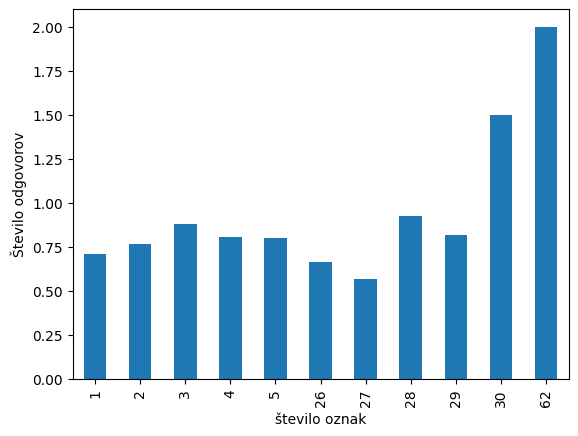

In [143]:
vprasanja_z_oznakami.groupby("število oznak")["Število odgovorov"].mean().plot.bar(ylabel="Število odgovorov")

<Axes: xlabel='število oznak', ylabel='Glasovi'>

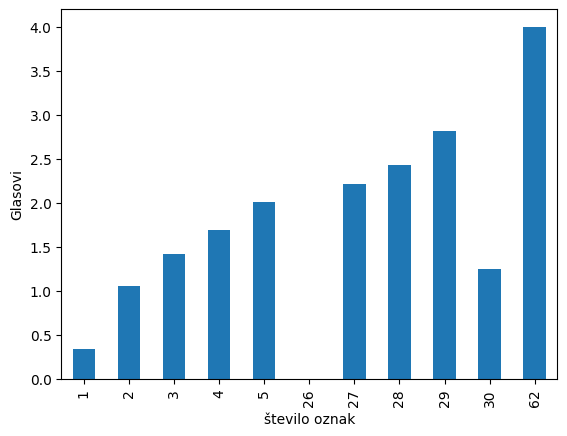

In [139]:
vprasanja_z_oznakami.groupby("število oznak")["Glasovi"].mean().plot.bar(ylabel="Glasovi")